In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot


In [2]:
# Setting the theme
# matplotlib.rcParams is global to the matplotlib package, and therefore, we can change the default settings!
plt.style.use('ggplot')
sns.set(context = 'notebook', style = 'darkgrid', palette = 'colorblind', font = 'sans-serif', font_scale = 1, rc = None)

matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family']= 'sans-serif'

# Data Analysis

In [16]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [17]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [19]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [21]:
train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [22]:
#train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
#plt.title('Data types');

In [23]:
# Viewing the numerical columns
num_cols = [c for c in train.columns if train.dtypes[c] != 'object']
num_cols

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [24]:
#The following columns are not useful for us!
num_cols.remove('Purchase')
num_cols.remove('User_ID')

In [25]:
#Viewing the categorical values
cat_cols = [c for c in train.columns if train.dtypes[c] == 'object']
cat_cols

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Filling in Missing Values

In [26]:
missing_values = train.isnull().sum()
percent_missing = missing_values/train.shape[0]*100
mis_table = {'Missing Values': missing_values, 'Percent Missing': percent_missing}

frame = pd.DataFrame(mis_table)
frame

,Missing Values,Percent Missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


Text(0.5, 1.0, 'Missing Values')

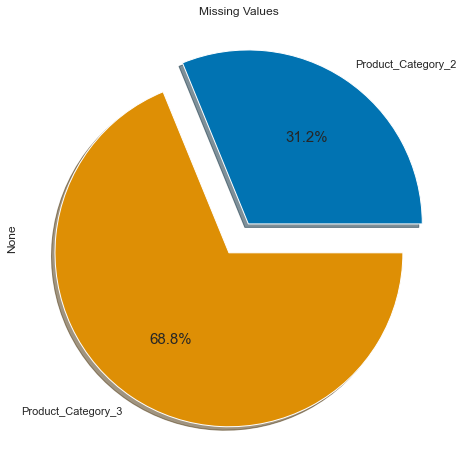

In [27]:
mis_vals = missing_values[missing_values >0]
mis_vals.sort_values(inplace = True)
mis_vals.plot.pie(explode = [0.1, 0.1] , autopct = '%1.1f%%', shadow= True)
plt.title('Missing Values')

In [28]:
#Since Product category 3 is null for 69% transactions, we'll drop it. 
train.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [30]:
a = train.Product_Category_2.value_counts().sort_index()
a

2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_2, dtype: int64

In [31]:
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace =True)

In [32]:
#Since Product_Category_3 has 383247 missing values, we'll just drop this. 	
train = train.drop('Product_Category_3', axis = 1)

In [33]:
missing_valz = train.isnull().sum()
missing_valz

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

### Now that we've dealt with missing values, we can move on to Data Visualization

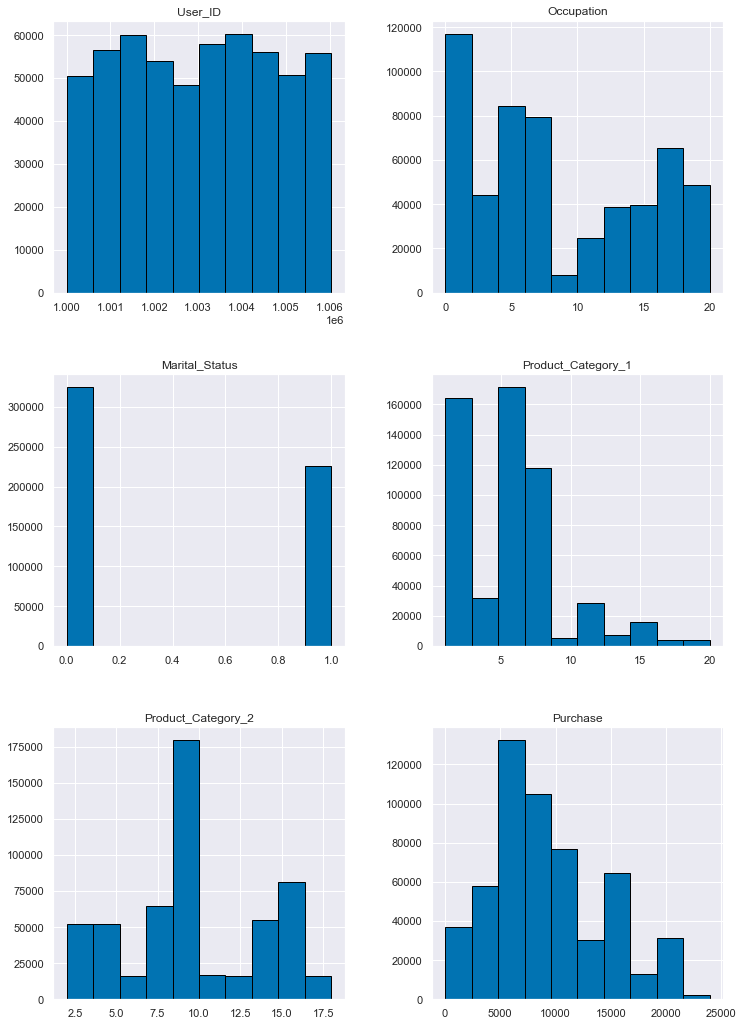

In [34]:
train.hist(edgecolor = 'black', figsize =(12, 18));

In [73]:
# Analyzing Data Columnwise

In [35]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

### Gender

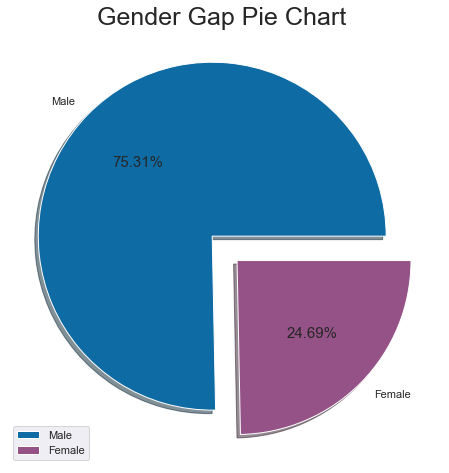

In [37]:
size = train['Gender'].value_counts()
lbl = ['Male', 'Female']
colors = ['#0f6ba4', '#955286']

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(size, colors = colors, labels =lbl, explode = [0.1, 0.1], shadow = True, autopct = "%.2f%%");
plt.title("Gender Gap Pie Chart ", fontsize = 25);
plt.axis('off')
plt.legend()
plt.show()

### Age

In [38]:
age_col = zip(train.Age.value_counts().index , train.Age.value_counts().values)

In [43]:
age_col = sorted(list(age_col))

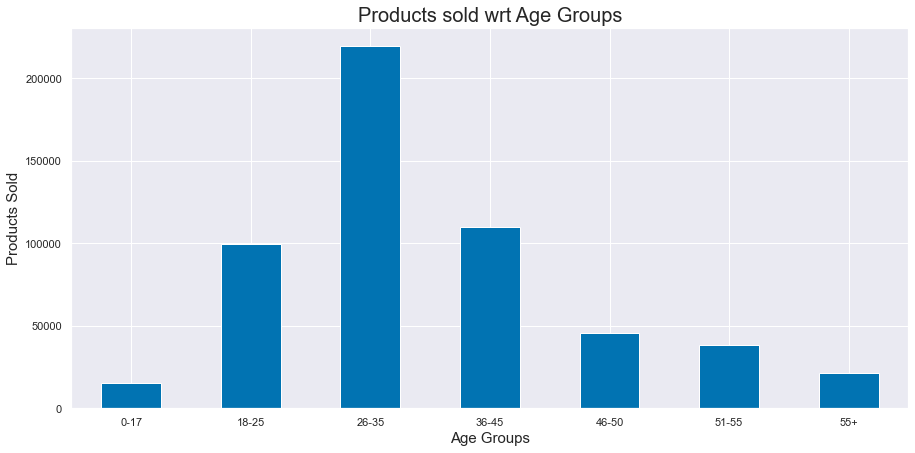

In [41]:
age , prod_bought = zip(*age_col)
age = list(age)
prod_bought = list(prod_bought)
x1 = pd.DataFrame({'Products Bought': prod_bought}, index = age)
plt.rcParams['figure.figsize'] = (15, 7)
my_colors =['r', 'b', 'g', 'c', 'brown', 'm','y']
x1['Products Bought'].plot(kind = 'bar', stacked ='True' );
plt.title('Products sold wrt Age Groups', fontsize = 20)
plt.xticks(rotation =0, horizontalalignment ='center')
plt.xlabel("Age Groups", fontsize = 15)
plt.ylabel("Products Sold", fontsize = 15)
plt.show()


### Occupation

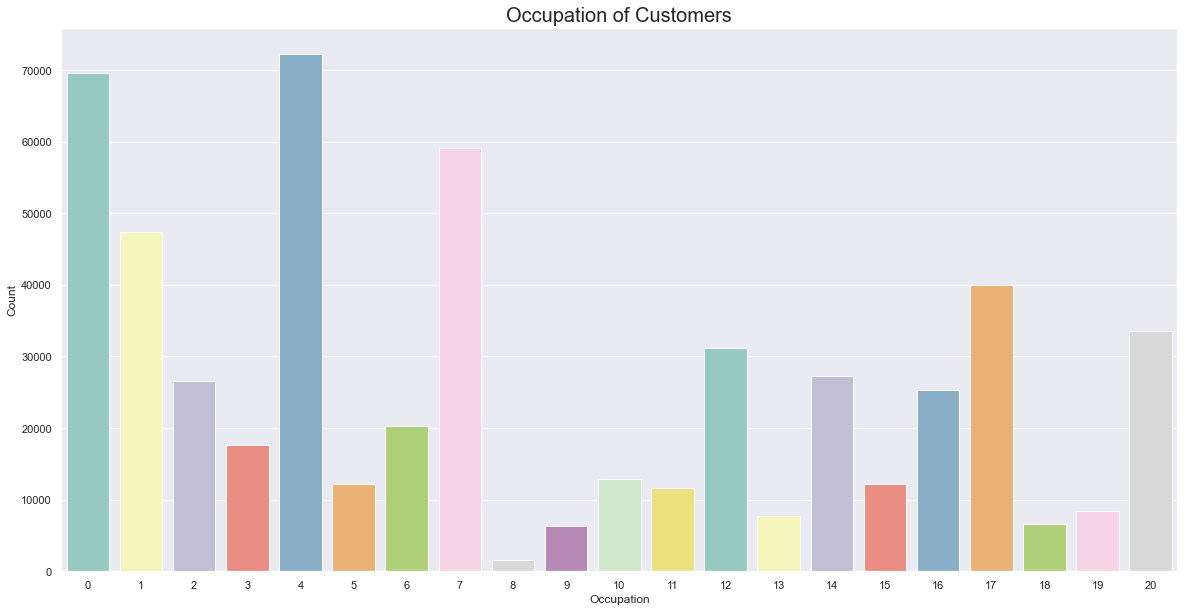

In [48]:
plt.rcParams['figure.figsize'] = (20, 10)
palet =sns.color_palette("Set3")
sns.countplot(data = train, x = 'Occupation' , palette = palet)
plt.title("Occupation of Customers", fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

### Money spent vs Occupation


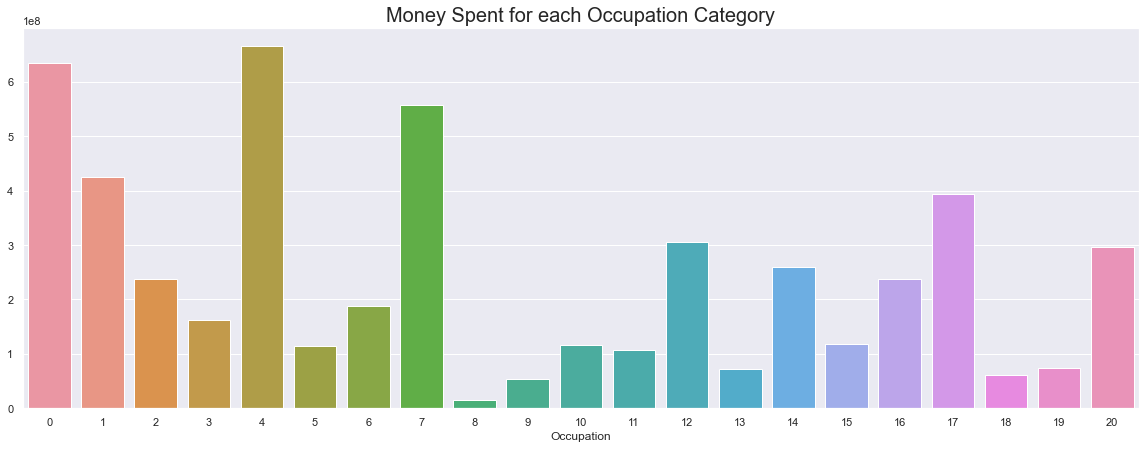

In [50]:
money_by_occ = train.groupby(by= 'Occupation').sum()['Purchase']
plt.figure(figsize = (20, 7))
sns.barplot(x =money_by_occ.index , y = money_by_occ.values)
plt.title('Money Spent for each Occupation Category', fontsize = 20)
plt.show()

# The Correlation is v.good (between Money Spent & Occupation)

### City 

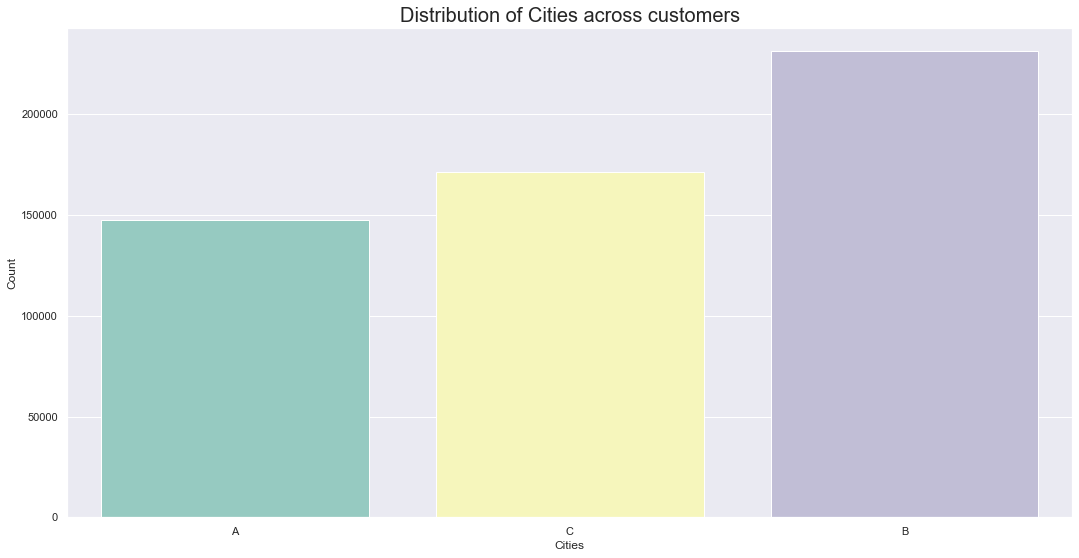

In [52]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(data= train, x ='City_Category', palette = palet)
plt.title("Distribution of Cities across customers", fontsize = 20)
plt.xlabel("Cities")
plt.ylabel("Count")
plt.show()

### Money spent by city category

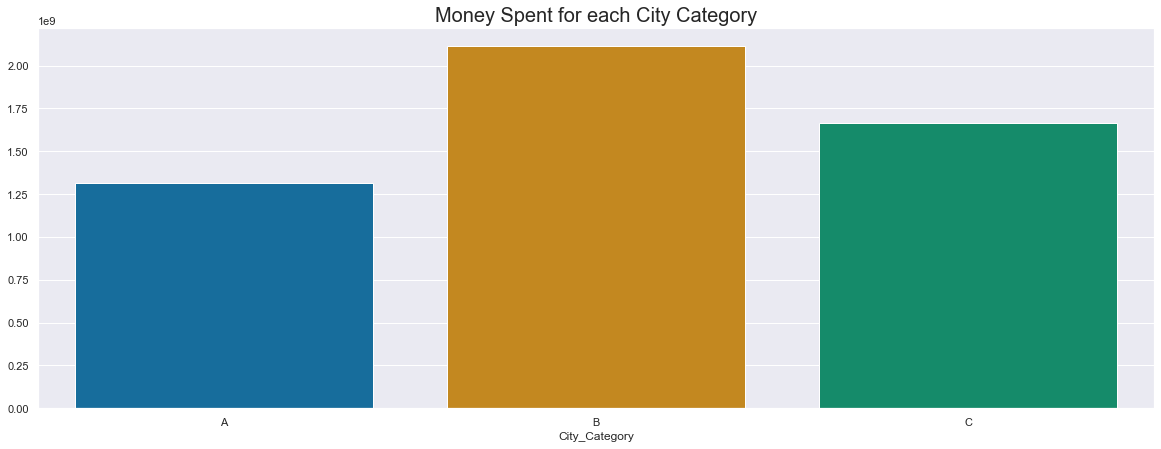

In [55]:
money_by_city_categ = train.groupby(by= 'City_Category').sum()['Purchase']
plt.figure(figsize = (20, 7))
sns.barplot(x =money_by_city_categ.index , y = money_by_city_categ.values)
plt.title('Money Spent for each City Category', fontsize = 20)
plt.show()

### Products

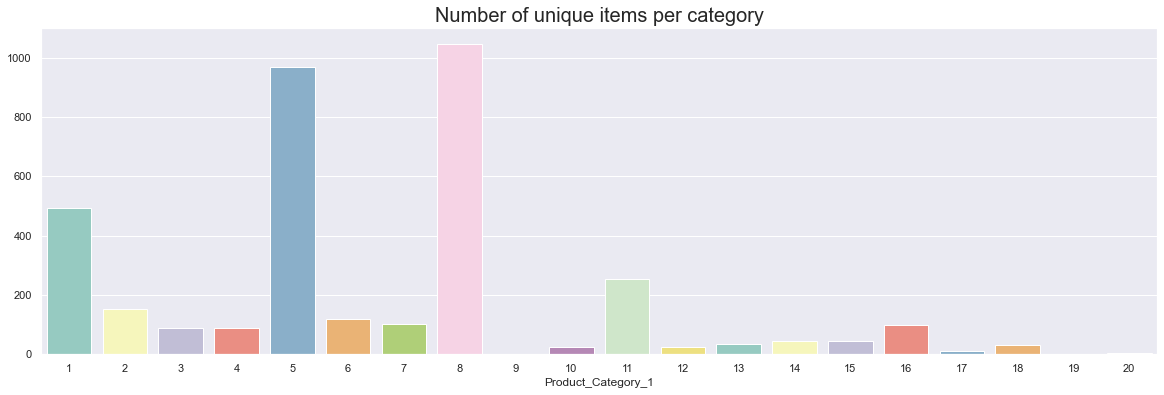

In [56]:

plt.figure(figsize=(20, 6))
prod_by_cat =train.groupby("Product_Category_1")['Product_ID'].nunique()

sns.barplot(x = prod_by_cat.index, y = prod_by_cat.values, palette = palet)
plt.title("Number of unique items per category", fontsize = 20)
plt.show()

In [57]:
# Category 1, 5 & 8 have large number of unique items, which could be either due to the categories being broad, or the fact that the store is known for such categories

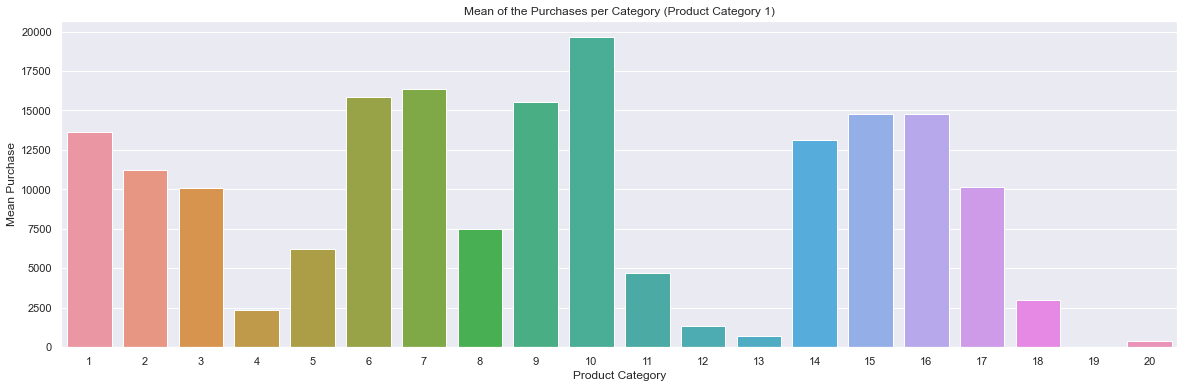

In [59]:
categ = []
mean_purch=[]

for i in train['Product_Category_1'].unique():
    categ.append(i)
    
categ.sort()

for e in categ:
    mean_purch.append(train[train['Product_Category_1']==e]['Purchase'].mean())
    
plt.figure(figsize = (20, 6))

sns.barplot( x =categ, y = mean_purch)
plt.title("Mean of the Purchases per Category (Product Category 1)")
plt.xlabel("Product Category")
plt.ylabel("Mean Purchase")
plt.show()

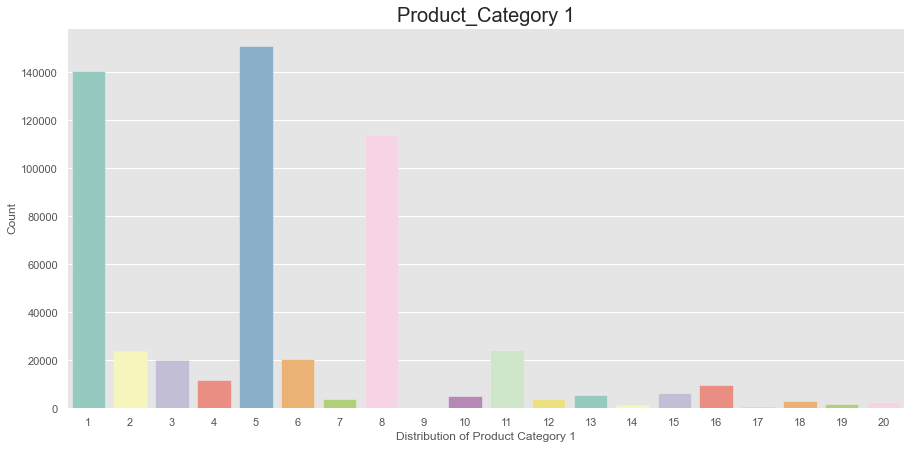

In [62]:
#Visualizing Different Product Categories
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')

sns.countplot(data= train, x ='Product_Category_1'
              , palette = palet)
plt.title("Product_Category 1", fontsize =20)
plt.xlabel("Distribution of Product Category 1")
plt.ylabel("Count")
plt.show()

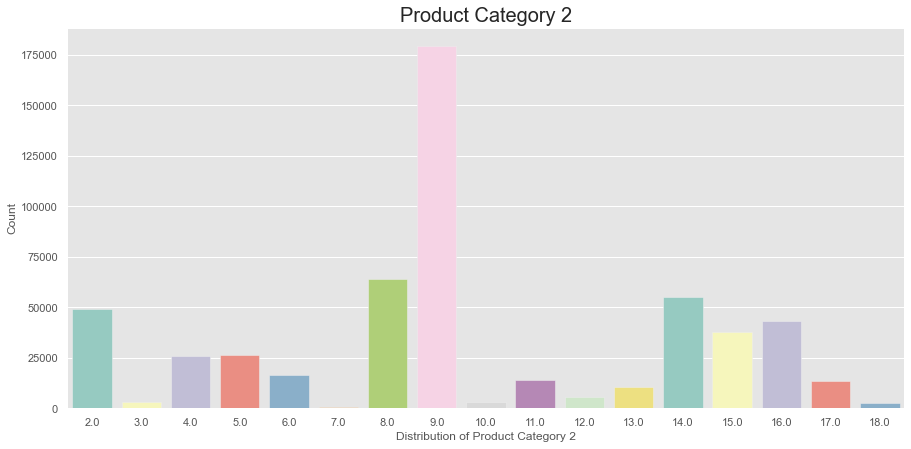

In [63]:
sns.countplot(data = train, x = 'Product_Category_2' , palette = palet)
plt.title('Product Category 2' , fontsize = 20)
plt.xlabel("Distribution of Product Category 2")
plt.ylabel("Count")
plt.show()

### Visualizing the Purchase Attribute

In [95]:
from scipy import stats


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



mu 9263.968712959126 & sigma 5023.060827959928 for the normal curve are:


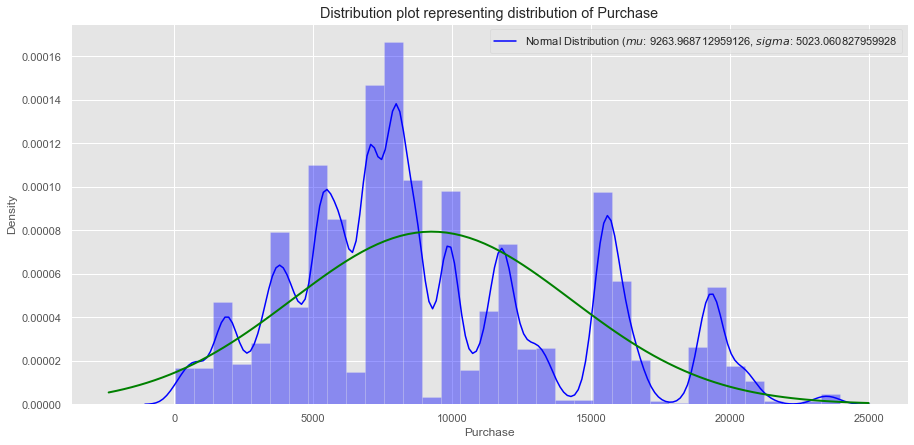

In [120]:
#Distribution plot of Purchase
plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['Purchase'],  bins = 35, color = 'blue')
#plt.hist(train['Purchase'],  bins = 35, color = 'blue')
plt.title("Distribution plot representing distribution of Purchase")

# Fitting Purchase to a normal curve
mu, sigma= stats.norm.fit(train['Purchase'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, 25000, 100)
p = stats.norm.pdf(x, mu, sigma)
print("mu {} & sigma {} for the normal curve are:".format(mu, sigma))
plt.plot( x, p , 'k', linewidth = 2, color = 'green')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu , sigma)], loc = 'best')
plt.show()

# Data Selection for Model Training

In [121]:
# Dropping Product ID and User ID

In [122]:
train = train.drop(['Product_ID' , 'User_ID'], axis = 1)

In [123]:
print(train.shape)

(550068, 9)


In [124]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


In [125]:
#Coverting Categorical Data into indicator variables 
df_gender =pd.get_dummies(train['Gender'])
df_age = pd.get_dummies(train['Age'])
df_City = pd.get_dummies(train['City_Category'])
df_Stay =pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final = pd.concat([train['Occupation'],train['Marital_Status'], train['Product_Category_1'], train['Product_Category_2'], train['Purchase'], df_gender, df_age, df_City, df_Stay ], axis = 1)

In [126]:
data_final.head()
data_final.shape

(550068, 22)

In [128]:
data_final.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
A                       uint8
B                       uint8
C                       uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
dtype: object

# Predicting the Purchase Amounts

In [129]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [130]:
x = data_final.drop("Purchase", axis =1 )
y = data_final['Purchase']

In [131]:
print(x.shape)
print(y.shape)

(550068, 21)
(550068,)


In [132]:
x_tr , x_tst, y_tr, y_tst = train_test_split(x, y, test_size = 0.25)

In [133]:
# Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_tst =sc.transform(x_tst)

In [137]:
print(x_tst.mean())
print(x_tr.mean())

-0.0001342118335837755
2.3076559257241544e-17


# Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_tr, y_tr)
print(lr.fit(x_tr, y_tr))

LinearRegression()


In [139]:
print("Intercept Parameter:", lr.intercept_)
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns = ['Coefficent'])
print(coeff_df)

Intercept Parameter: 9261.332615191142
                      Coefficent
Occupation          4.386447e+01
Marital_Status     -2.981174e+01
Product_Category_1 -1.639015e+03
Product_Category_2 -2.473933e+02
F                   3.442207e+13
M                   3.442207e+13
0-17                3.492680e+14
18-25               8.214120e+14
26-35               1.044986e+15
36-45               8.531572e+14
46-50               5.878054e+14
51-55               5.445345e+14
55+                 4.141781e+14
A                   1.922461e+15
B                   2.141651e+15
C                   2.009682e+15
0                   2.908784e+15
1                   4.066902e+15
2                   3.305380e+15
3                   3.221008e+15
4+                  3.072755e+15


In [140]:
predicts = lr.predict(x_tst)
print("Predicted purchases in for new customers: ", predicts)

Predicted purchases in for new customers:  [ 9473.72789497  7997.47789497 11060.97789497 ...  9436.47789497
  9661.97789497 11881.97789497]


In [141]:
print("MAE:", metrics.mean_absolute_error(y_tst, predicts))
print("MSE:", metrics.mean_squared_error(y_tst, predicts))

MAE: 3605.4852577307365
MSE: 22139627.939187355


# Decision Tree Regressor

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits= 10)
desc_tr = DecisionTreeRegressor(max_depth=15)
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_tr, y_tr)
print("Best classifier :", grid_sv.best_estimator_)


Best classifier : DecisionTreeRegressor(max_depth=7)


In [143]:
scores = cross_val_score(desc_tr, x_tr, y_tr, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -9125889.75 (+/- 53011.02)


In [148]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV

# gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=100, random_state=30)
# param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[6, 8, 10], 'min_samples_leaf':[3,5,9]}

# grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
# grid_sv.fit(x_tr, y_tr)
# print("Best classifier :", grid_sv.best_estimator_)

# scores = cross_val_score(gbr, x_tr, y_tr, cv=kf, scoring='neg_mean_squared_error')

# print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


# Cat Boost

In [149]:
from catboost import CatBoostRegressor

x_1 = train.drop("Purchase", axis =1 )
y_1 = train['Purchase']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, train_size=0.7, random_state=10)

In [151]:
cat_obj = X_train.select_dtypes(object).columns
cat_b = CatBoostRegressor(task_type ="GPU", learning_rate = 1, cat_features = cat_obj, 
                         depth = 9, verbose = 500, loss_function = "RMSE", n_estimators = 1500)
cat_b.fit(X_train, y_train, eval_set = (X_test, y_test), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5023.2015997	test: 5021.7072783	best: 5021.7072783 (0)	total: 557ms	remaining: 13m 55s
500:	learn: 4913.5608951	test: 4928.0853293	best: 4927.9787927 (476)	total: 3m 7s	remaining: 6m 14s
1000:	learn: 3015.6105757	test: 3020.4697327	best: 3020.4513252 (804)	total: 6m 39s	remaining: 3m 19s
1499:	learn: 3015.6106886	test: 3020.4697327	best: 3020.4513252 (804)	total: 10m 34s	remaining: 0us
bestTest = 3020.451325
bestIteration = 804
Shrink model to first 805 iterations.


In [152]:
print("Training Score is: ", cat_b.score(X_train, y_train))
print("Test score is: ", cat_b.score(X_test, y_test))

print("RMSE is: ", cat_b.best_score_['learn']["RMSE"])

Training Score is:  0.6386499563983042
Test score is:  0.6382244587683363
RMSE is:  3015.610237089152


# Finding the important Features

<AxesSubplot:xlabel='importance', ylabel='col'>

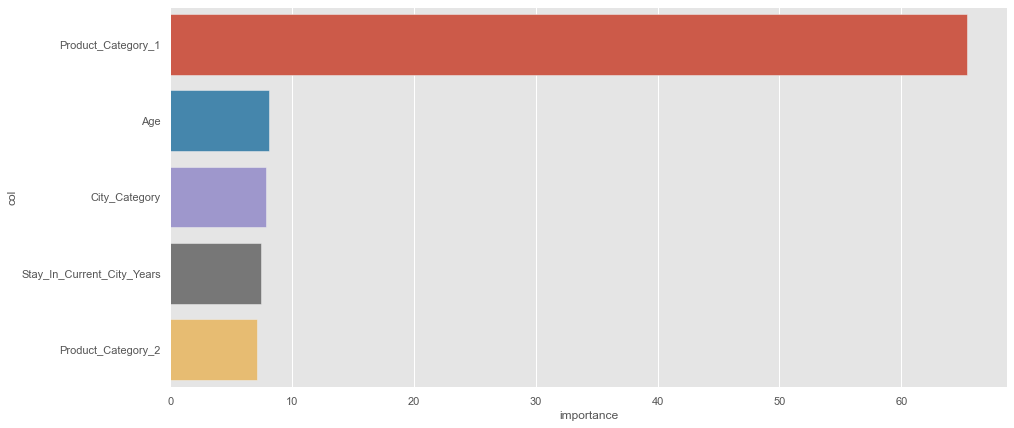

In [153]:
imp_feat = pd.DataFrame(cat_b.get_feature_importance(), columns = ['importance'])
imp_feat['col']= X_train.columns
imp_feat_top4 = imp_feat.sort_values(by = 'importance', ascending = False)[:5]

sns.barplot(y = 'col', x = 'importance', data = imp_feat_top4, orient = 'h')

In [154]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = cat_b.predict(X_test)
mae_1 = mean_absolute_error(y_test, predictions)
mse_1 = mean_squared_error(y_test, predictions)
print("Mean Absolute Error: " ,mae_1)
print("Mean Squared Error: ", mse_1)

Mean Absolute Error:  2293.807377590577
Mean Squared Error:  9123126.894335547


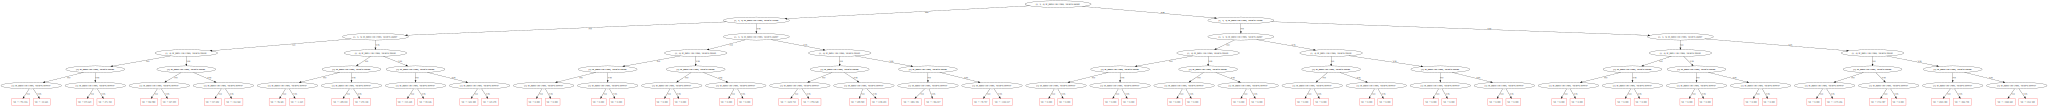

In [155]:
cat_b.plot_tree(1)